In [2321]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sys.path.append('/home/pablo/Documents/code/jupyter')

from src.my_sort import InfinitesimalSort, return_subarray, index_from_thresholds, sort
from src.sort_analyzer import measure_disorder, quasi_sort, quasi_sort_two
from functools import partial

optimal = InfinitesimalSort()
nan = np.nan


In [2323]:
thresholds = {i: optimal.thresholds(i)[1]  for i in range(36)}

In [2331]:
par_sort = partial(sort, thresholds=thresholds, raise_error=False)
par_quasi_sort = partial(quasi_sort, thresholds=thresholds)
par_quasi_sort_two = partial(quasi_sort_two, thresholds=thresholds)
no_sort = lambda x: x
trials = 6
# uniform = lambda slots: np.random.uniform(0, 1, size=(trials, slots))
uniform = lambda slots: np.random.uniform(0, 1, size=slots)

In [2324]:
def disorder_generator(n, fun=no_sort, type=0):
    slots = range(1, n+1)
    i=1
    prev_disorder= np.zeros(n)
    while True:
        arrays = map(uniform, slots)
        arrays = map(fun, arrays)
        disorder = map(measure_disorder, arrays)
        prev_disorder += np.array(list(disorder)).T[type]
        avg_disorder = prev_disorder/i
        yield avg_disorder
        i+=1

In [2517]:
n = 35
mtype = 0
not_sorted = disorder_generator(n, type=mtype)
arr_sorted = disorder_generator(n, par_sort,mtype)

In [2525]:
for i in range(500):
    next(not_sorted)
    next(arr_sorted)

In [2529]:
x = np.array(range(1, n+1))
y = np.array(next(arr_sorted))

def func(x, a, b, c):
    return a + b*x**c

popt, pcov = curve_fit(func, x, y)

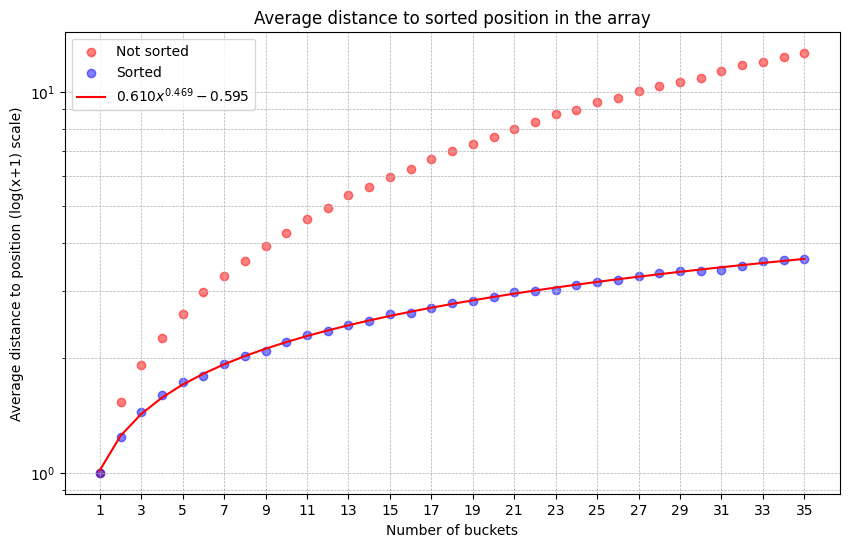

In [2530]:
plt.figure(figsize=(10, 6))
plt.scatter(x, next(not_sorted)+1, c='r', alpha=0.5, label='Not sorted')
plt.scatter(x, next(arr_sorted)+1, c='b', alpha=0.5, label='Sorted')
plt.plot(x, func(x, *popt)+1, 'r-', label=f'${popt[1]:5.3f}x^{{{popt[2]:5.3f}}} {popt[0]:5.3f}$')

plt.yscale('log')

plt.title("Average distance to sorted position in the array")
plt.xlabel('Number of buckets')
plt.ylabel('Average distance to position (log(x+1) scale)')
plt.xticks(np.arange(1, n+1, 2))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(
    f"../figures/Avg_distance_to_sorted_log.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

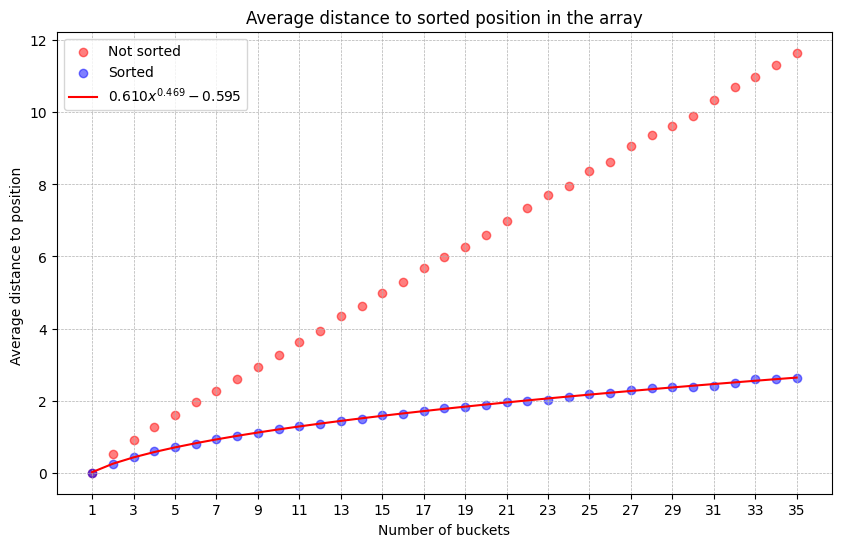

In [2531]:
plt.figure(figsize=(10, 6))
plt.scatter(x, next(not_sorted), c='r', alpha=0.5, label='Not sorted')
plt.scatter(x, next(arr_sorted), c='b', alpha=0.5, label='Sorted')
plt.plot(x, func(x, *popt), 'r-', label=f'${popt[1]:5.3f}x^{{{popt[2]:5.3f}}} {popt[0]:5.3f}$')

# plt.yscale('log')

plt.title("Average distance to sorted position in the array")
plt.xlabel('Number of buckets')
plt.ylabel('Average distance to position ')
plt.xticks(np.arange(1, n+1, 2))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(f"../figures/Avg_distance_to_sorted_lin.png", dpi=300, bbox_inches="tight")
plt.show()

In [2546]:
n = 35
mtype = 2
not_sortedb = disorder_generator(n, type=mtype)
arr_sortedb = disorder_generator(n, par_sort,mtype)

In [2547]:
for i in range(100):
    next(not_sortedb)
    next(arr_sortedb)

In [2548]:
x = np.array(range(1, n+1))
y = np.array(next(arr_sortedb))

def func(x, a, b):
    return a + b*x

popt, pcov = curve_fit(func, x, y)

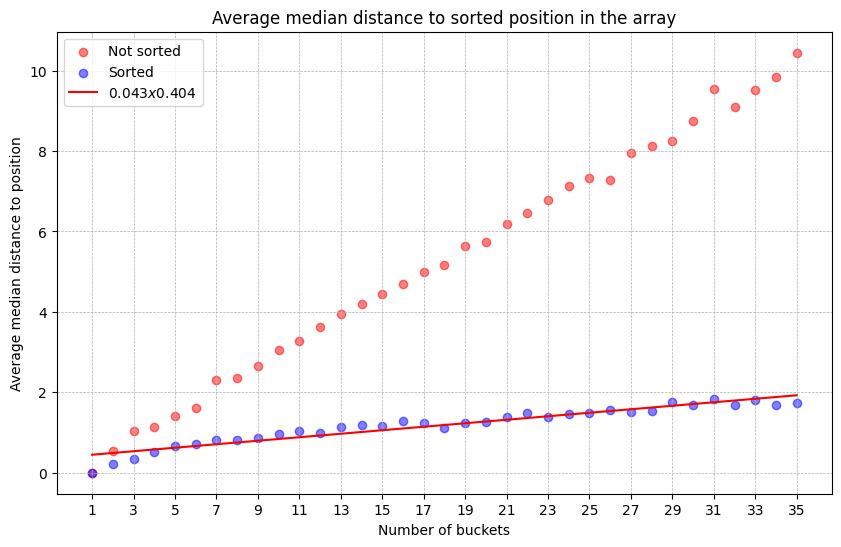

In [2549]:
plt.figure(figsize=(10, 6))
plt.scatter(x, next(not_sortedb), c='r', alpha=0.5, label='Not sorted')
plt.scatter(x, next(arr_sortedb), c='b', alpha=0.5, label='Sorted')
plt.plot(x, func(x, *popt), 'r-', label=f'${popt[1]:5.3f}x {popt[0]:5.3f}$')

plt.title("Average median distance to sorted position in the array")
plt.xlabel('Number of buckets')
plt.ylabel('Average median distance to position')
plt.xticks(np.arange(1, n+1, 2))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(f"../figures/avg_median_distance_to_sorted_lin.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
n = 35
mtype = 1
not_sortedb = disorder_generator(n, type=mtype)
arr_sortedb = disorder_generator(n, par_sort,mtype)